In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Exploration of the dataset, basic stats and dimensionality

In [2]:
df = pd.read_csv("/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [5]:
df.shape

(1659, 54)

# Dropping doctor in charge information, since it is all confidential

In [6]:
df.drop("DoctorInCharge", axis=1, inplace=True)

# Exploring for NULL values

In [7]:
df.isna().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCal

# Differentiating between categorical and numerical columns

In [8]:
cats = [i for i in df.columns if df[i].nunique() < 5]
nums = [i for i in df.columns if i not in cats]

# Count of categorical features

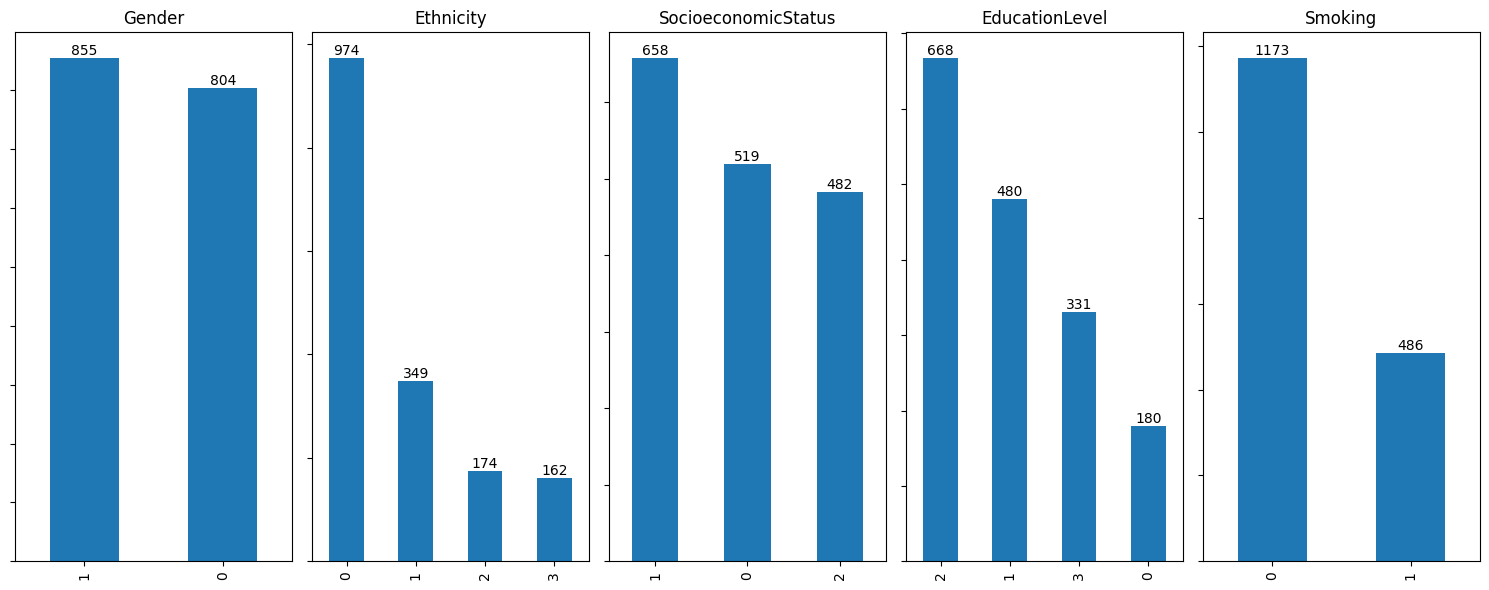

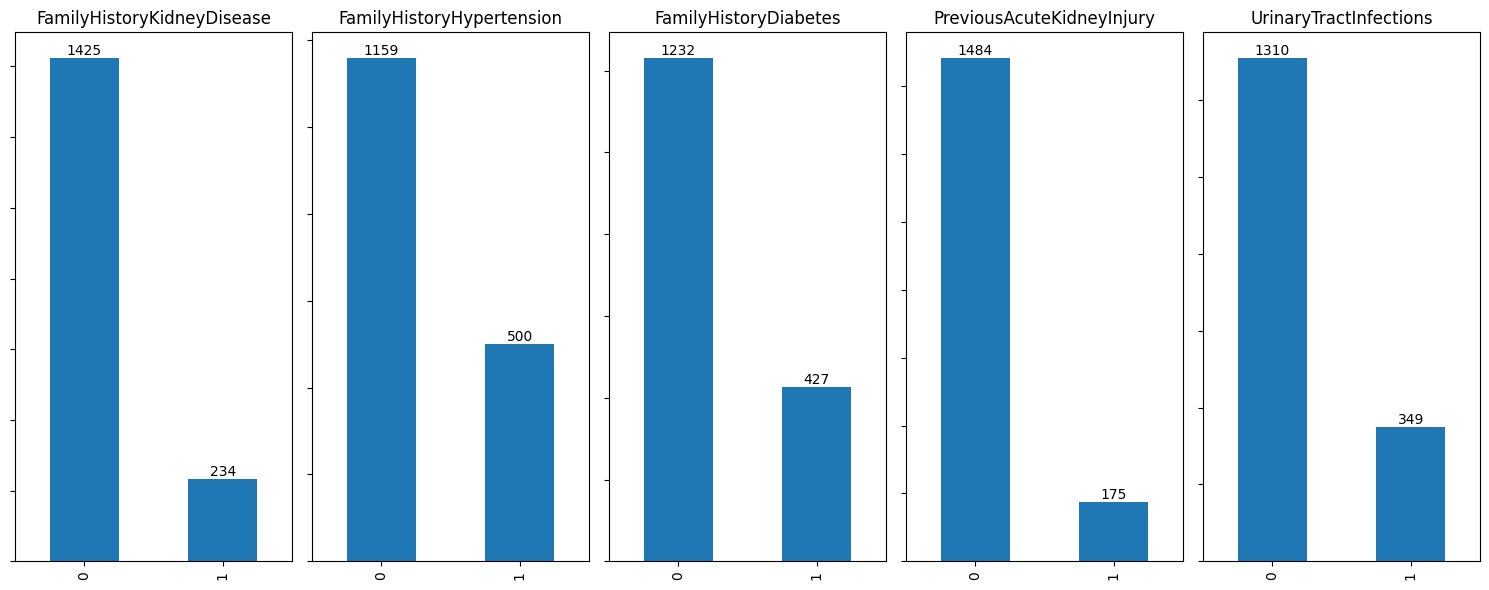

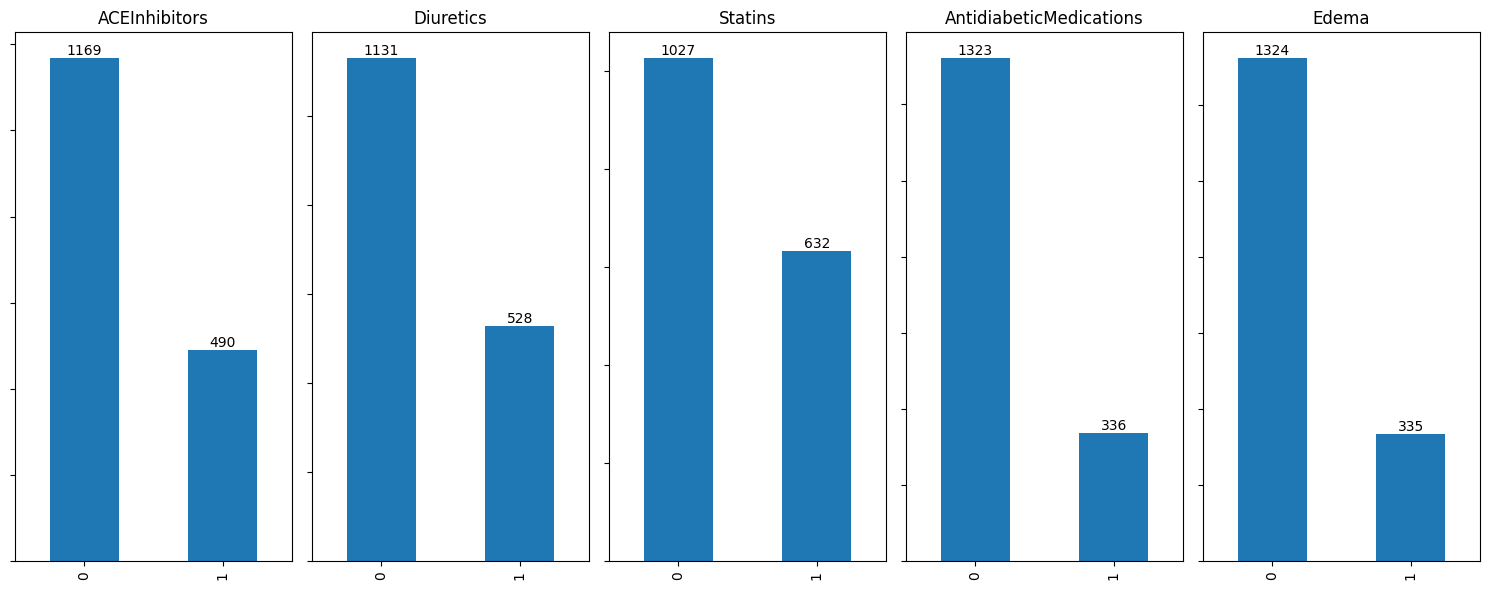

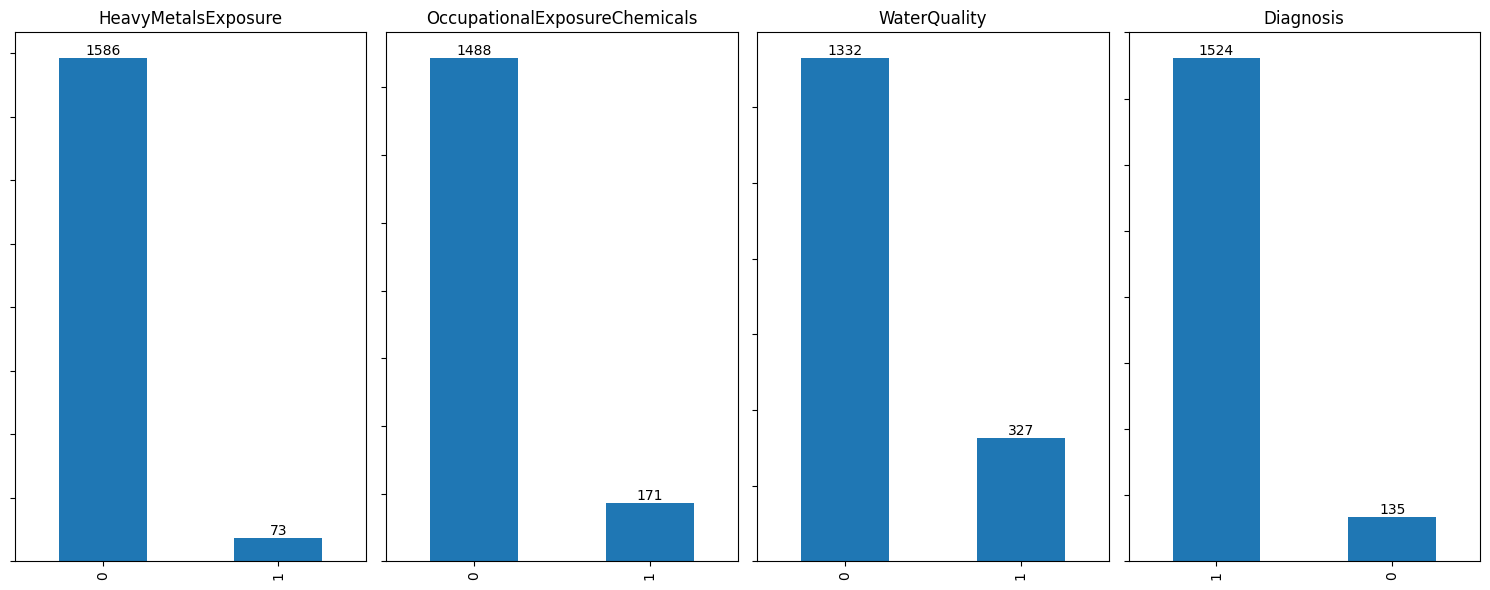

In [9]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for j in range(5):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(cats[index])
        index += 1
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
for j in range(4):
    count = df[cats[index]].value_counts()
    count.plot(kind="bar", ax=axes[j])
    for container in axes[j].containers:
        axes[j].bar_label(container)
    axes[j].set_yticklabels(())
    axes[j].set_ylabel("")
    axes[j].set_xlabel("")
    axes[j].set_title(cats[index])
    index += 1
plt.tight_layout()
plt.show()

# Which categorical feature affects diagnosis outcome

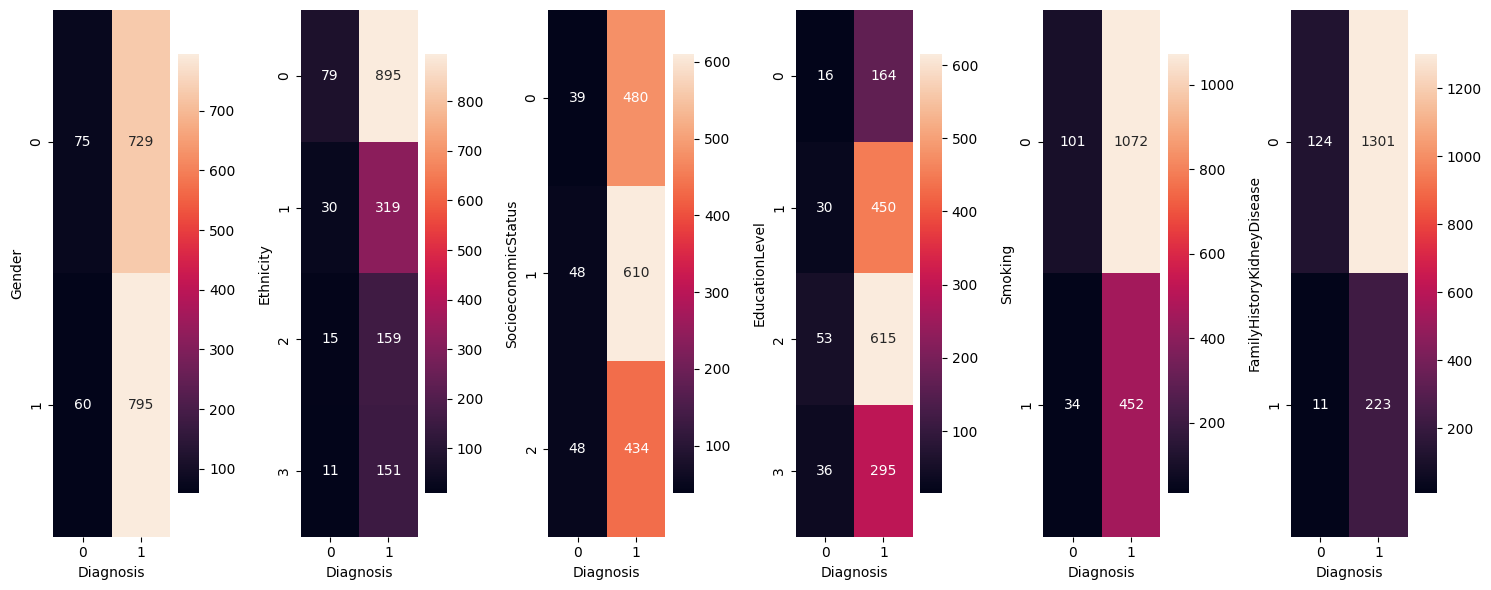

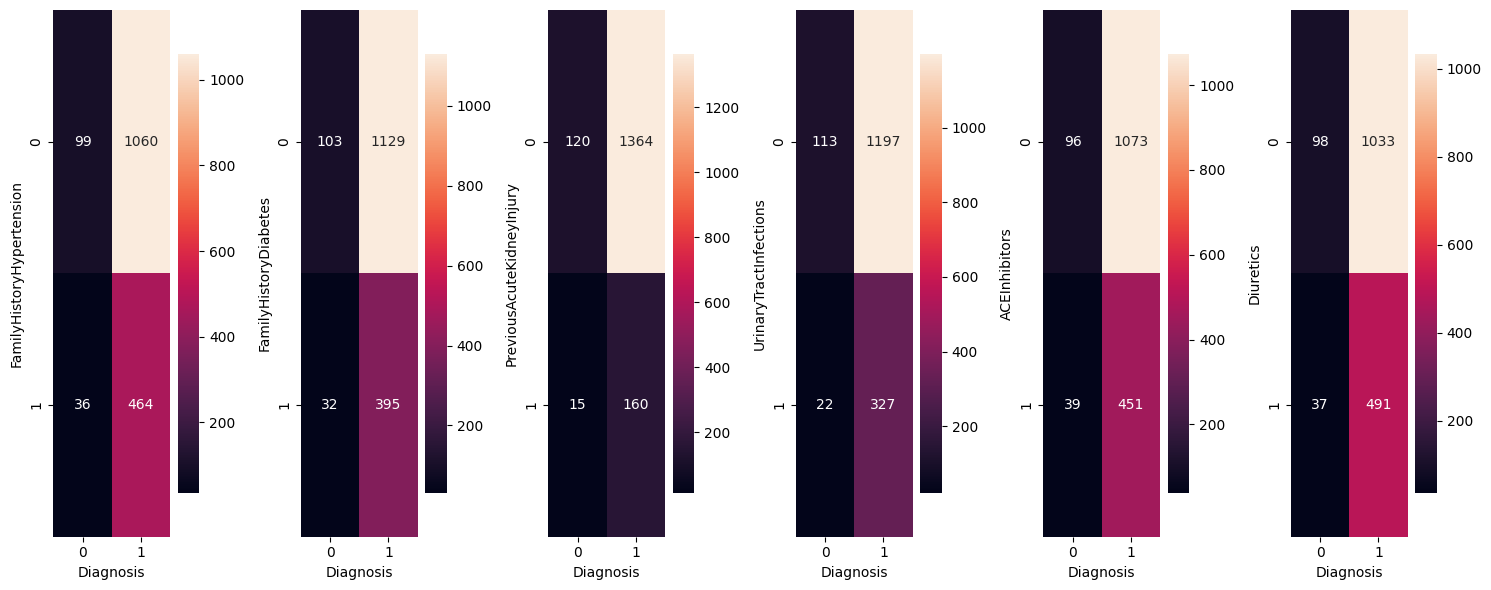

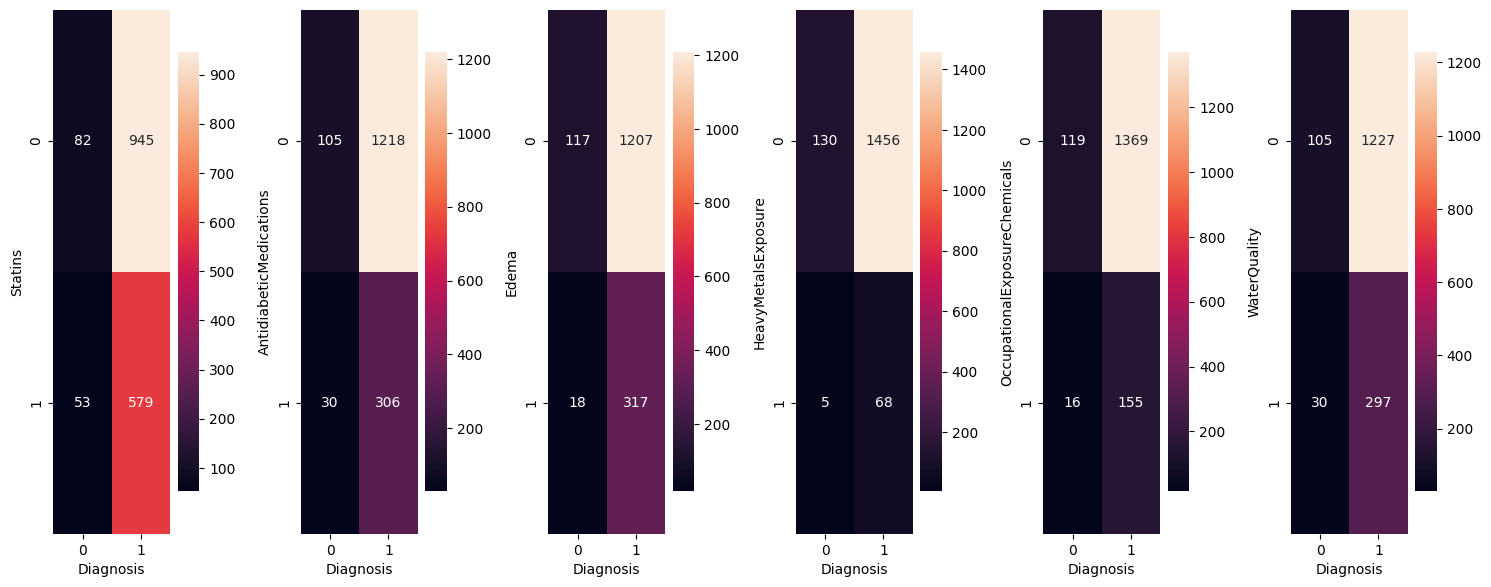

In [10]:
index = 0

for i in range(3):
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    for j in range(6):
        sns.heatmap(pd.crosstab(df[cats[index]], df[cats[-1]]), annot=True, fmt='d', ax=axes[j])
        index += 1
    plt.tight_layout()
    plt.show()

# Correlation matrix

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
PatientID,1.000000,0.001166,-0.023822,-0.016970,0.025289,0.029565,-0.036264,-0.005863,0.029087,-0.003768,0.017805,-0.027967,0.002202,-0.000886,0.004744,-0.002172,-0.038688,-0.056561,-0.003990,0.031931,0.016660,-0.022185,-0.006452,0.014405,0.024432,-0.001301,-0.015218,-0.004618,-0.033282,0.020958,0.015896,-0.020683,0.041464,-0.007586,0.033592,-0.003291,-0.012003,0.013110,-0.017152,0.008315,-0.059655,-0.010984,-0.019741,0.003806,-0.042814,-0.011147,-0.028480,0.002591,0.028288,-0.018654,0.001955,0.004524,-0.171405
Age,0.001166,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,0.004062,-0.005151,0.014984,-0.008672,0.001114,0.028253,0.042979,0.050918,0.007282,-0.006815,0.026093,-0.019612,-0.041336,0.045831,-0.021659,-0.032800,0.004838,-0.003220,0.028401,-0.039311,0.011719,-0.023106,0.001591,-0.015607,-0.021061,-0.001364,0.004348,0.019042,0.000734,-0.015058,-0.016797,0.002977,-0.029556,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.023822,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,0.011517,-0.004312,0.032584,-0.007058,0.019137,0.038519,0.021116,0.031253,0.027322,-0.006086,0.003495,0.010221,-0.012786,0.030294,0.012642,-0.017650,0.018728,0.026549,0.009740,-0.018112,0.006620,0.037077,0.012775,0.033222,-0.034570,0.011813,0.061844,-0.003433,-0.004258,0.026516,0.013072,-0.003961,0.000570,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.016970,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,-0.012721,0.029833,0.010630,-0.021725,0.007602,0.025920,-0.024939,-0.017903,0.016126,0.038599,0.050558,-0.019571,0.023219,0.004514,-0.005262,-0.034707,-0.000465,0.008823,-0.010712,0.004365,-0.021487,0.050441,-0.014540,0.012009,-0.007313,0.028524,-0.029121,0.048621,0.000414,0.018603,-0.022343,-0.060223,0.013447,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.025289,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,-0.000394,-0.019183,-0.041888,-0.004820,0.054200,0.030082,-0.008031,-0.023491,0.019670,-0.045426,0.000801,-0.017501,0.045003,0.016207,0.001996,0.003091,-0.020260,-0.020116,-0.035272,-0.026572,-0.010521,-0.062895,0.050025,-0.015586,-0.033922,-0.023946,-0.067039,0.017293,0.008145,-0.006773,-0.026162,-0.015654,0.002195,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.029565,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,-0.013261,-0.003333,-0.015611,-0.028275,-0.012103,0.029514,-0.012872,0.014516,-0.006849,0.013999,0.010064,-0.006992,-0.021090,0.027940,-0.005571,-0.004994,0.011247,-0.006916,-0.000648,-0.037646,0.024930,-0.044451,-0.012215,0.001961,-0.015520,0.026615,0.004259,0.013555,-0.002857,-0.027863,0.009537,-0.014135,-0.021006,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.036264,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0

# Data distribution among classes and average numerical values

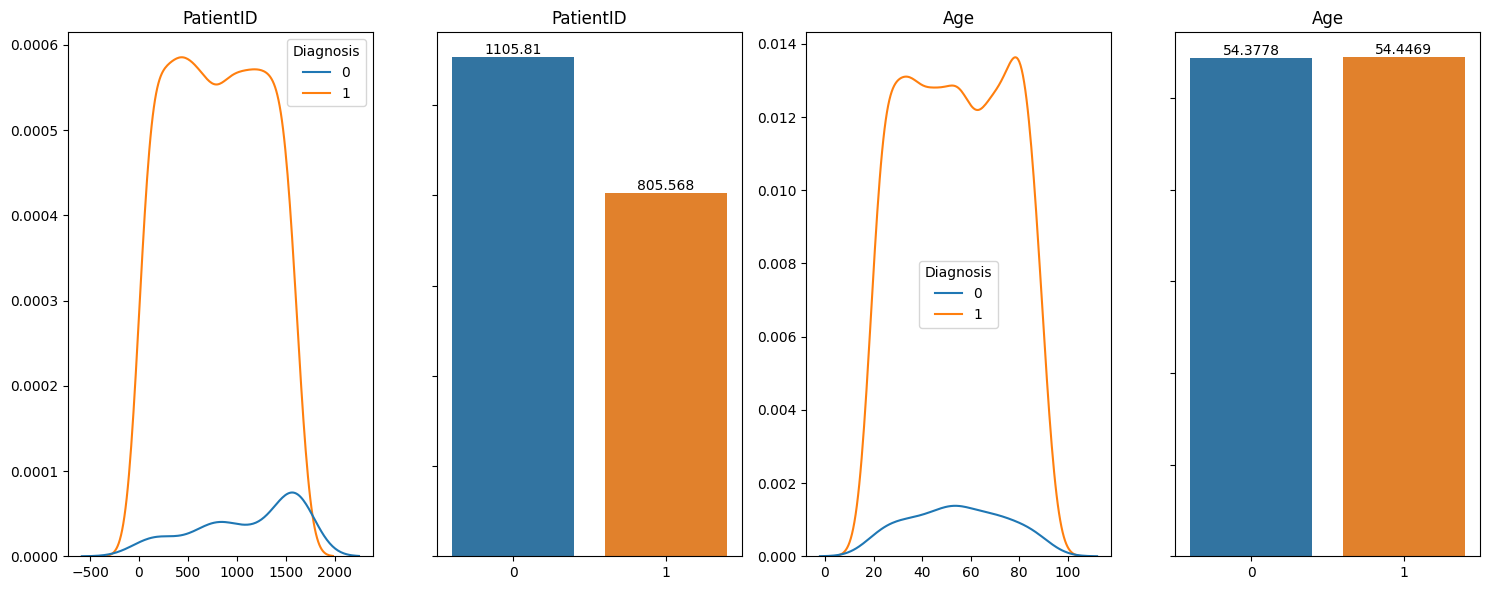

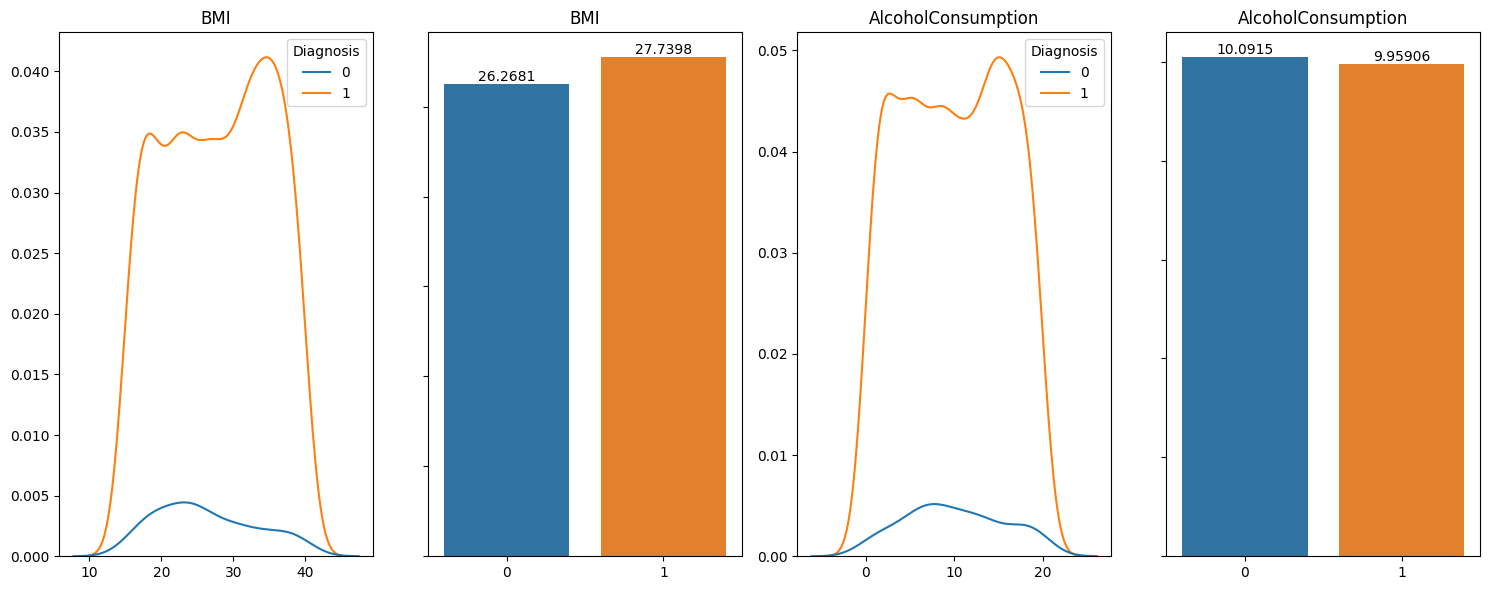

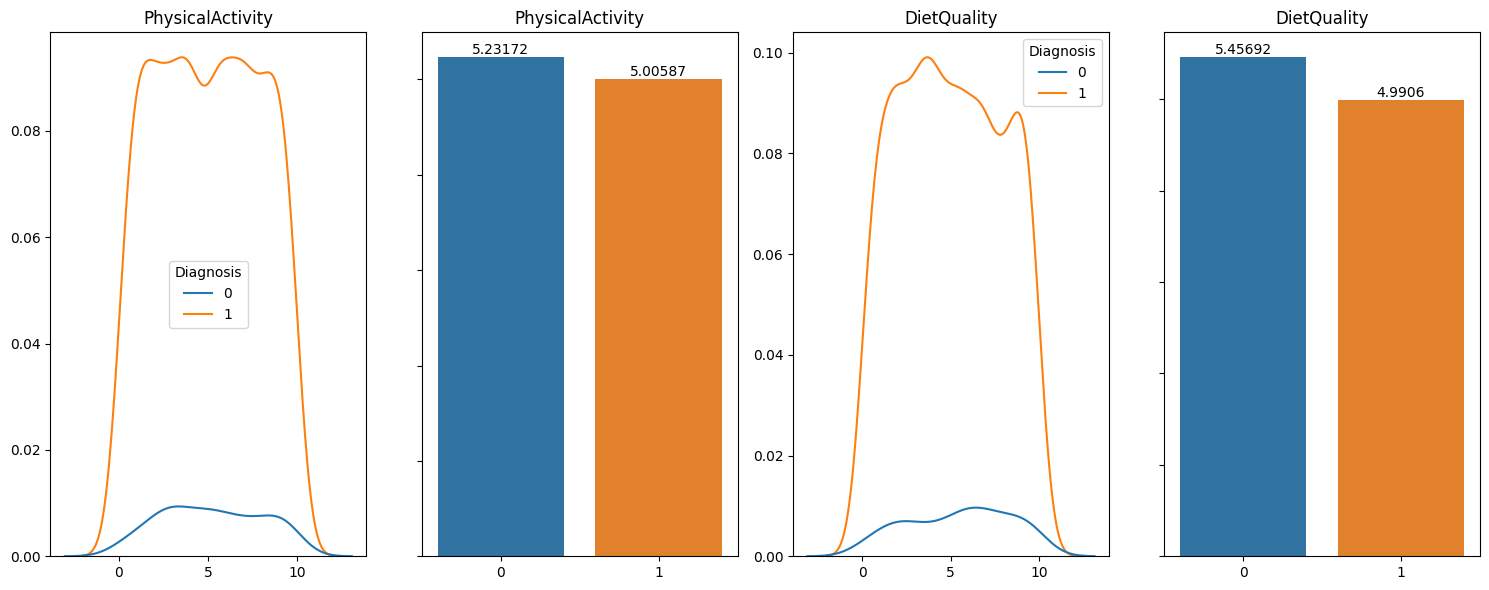

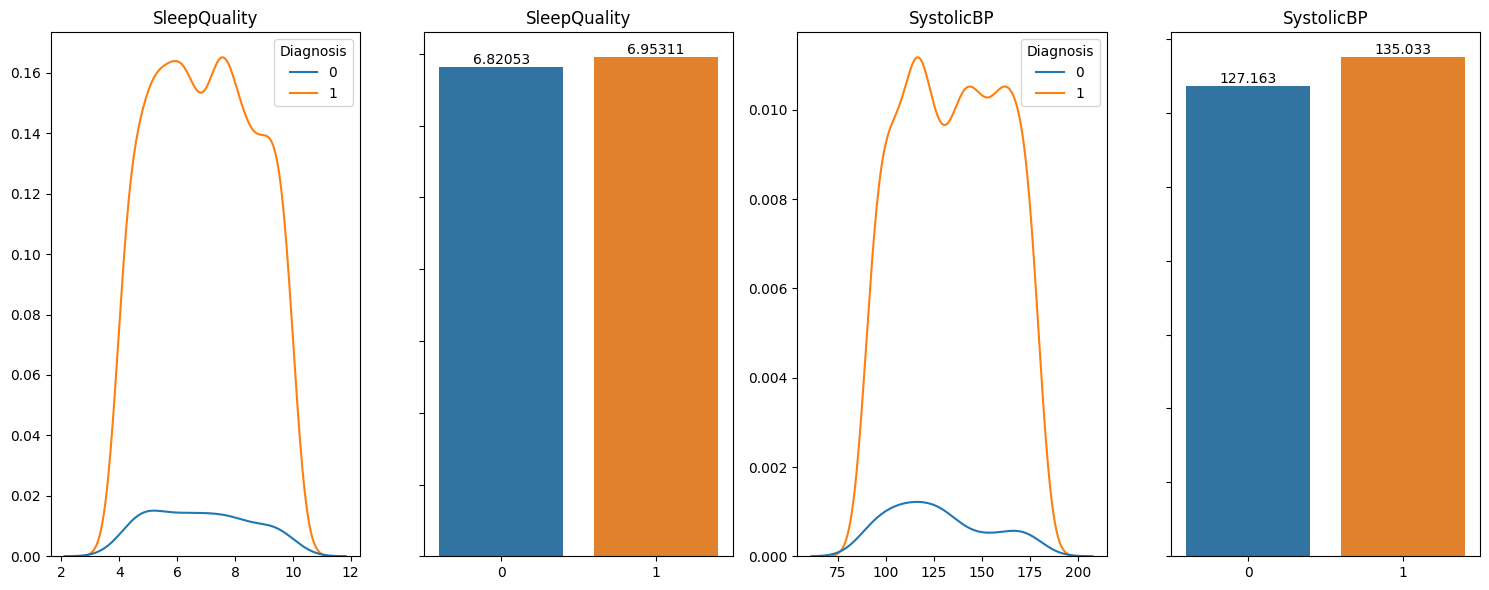

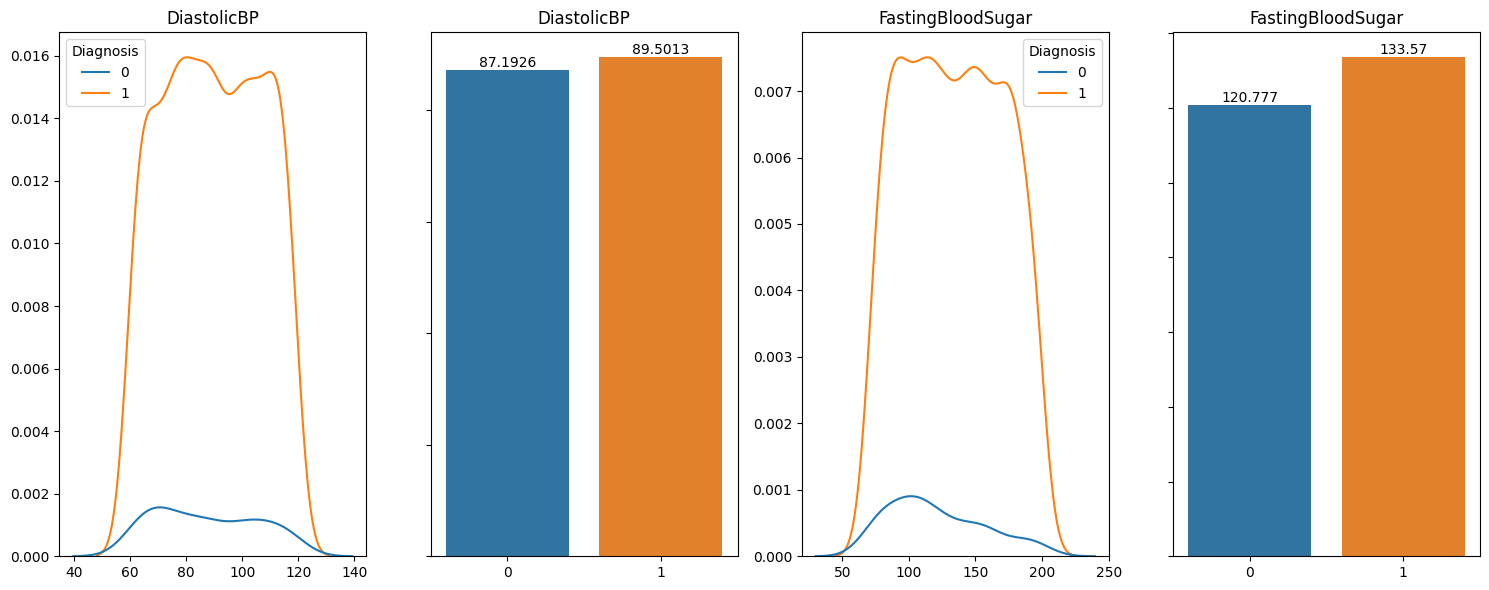

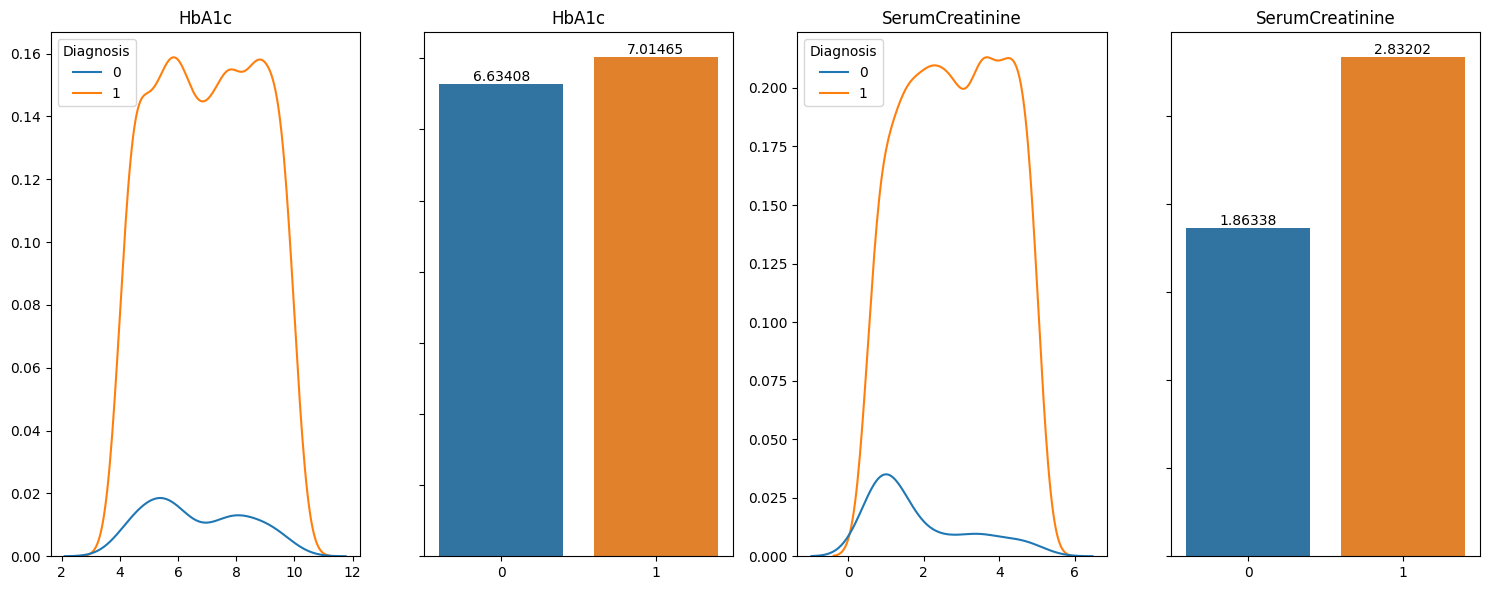

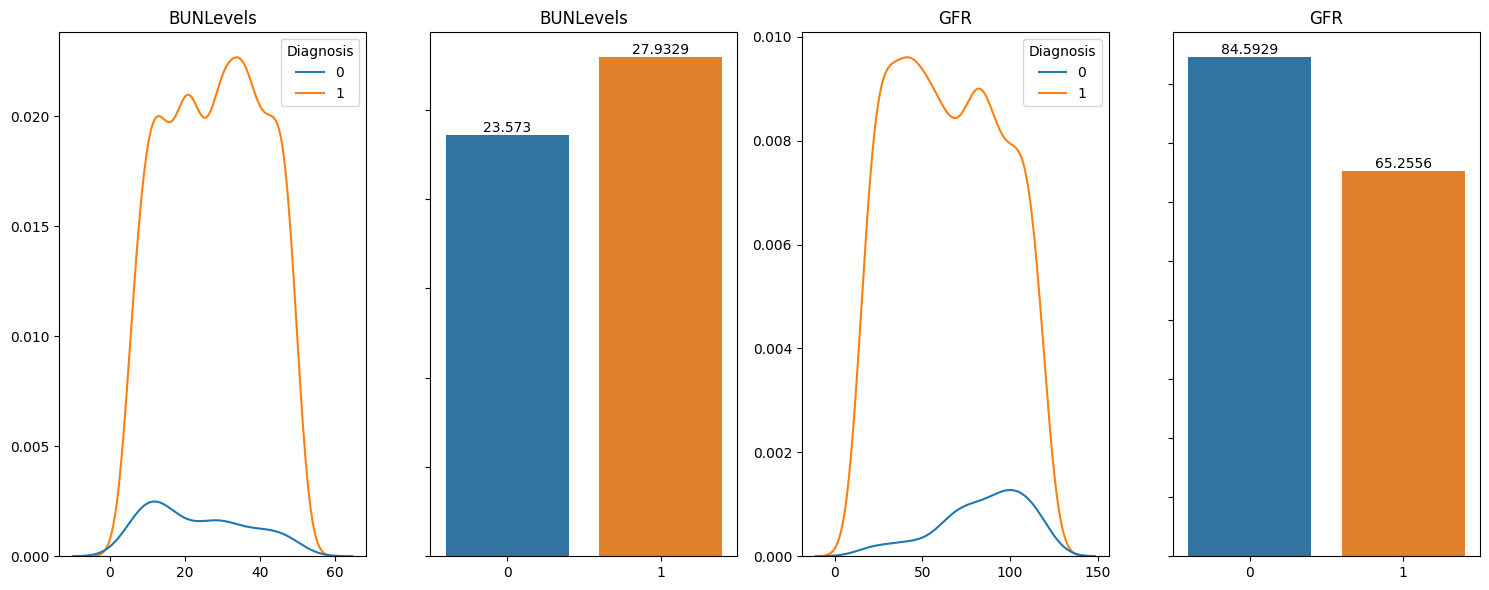

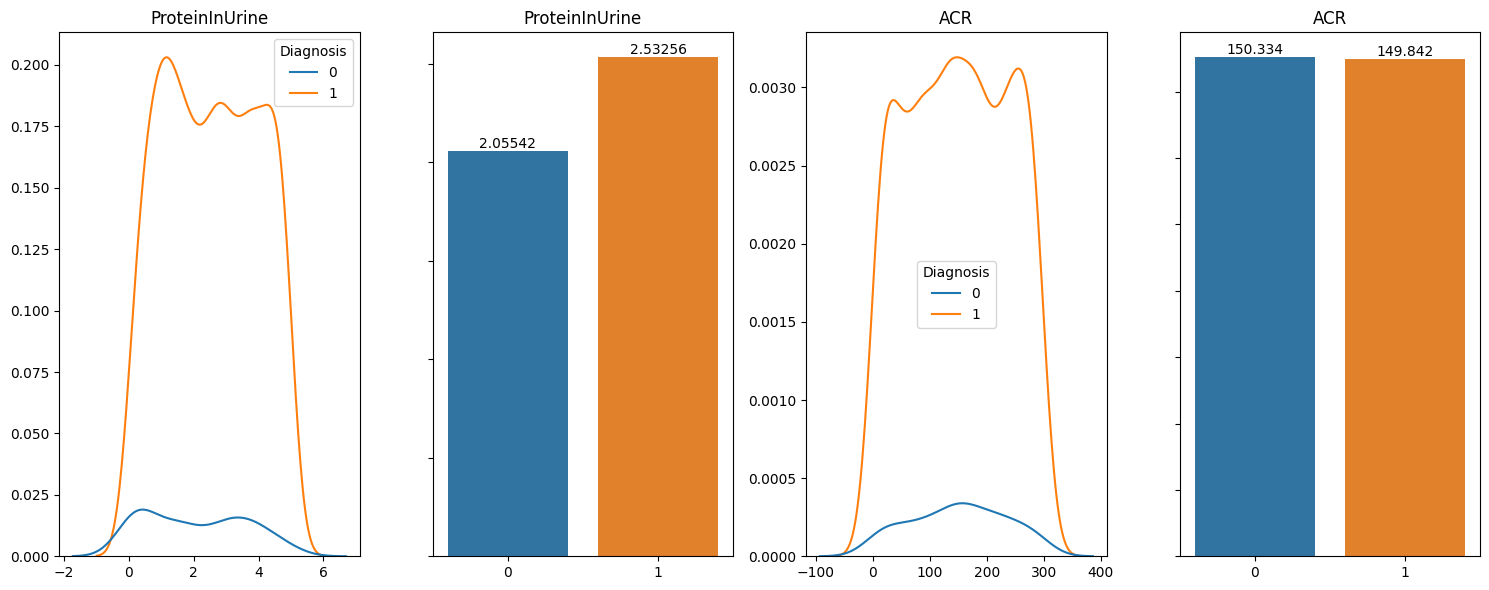

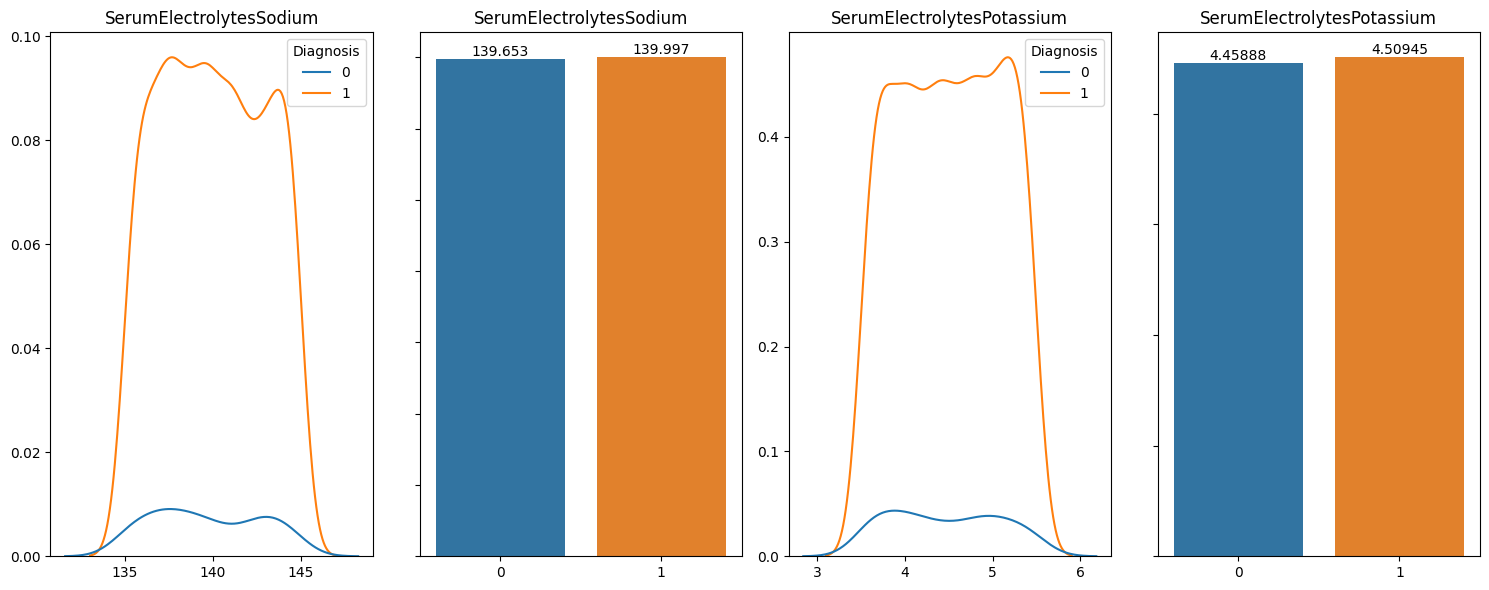

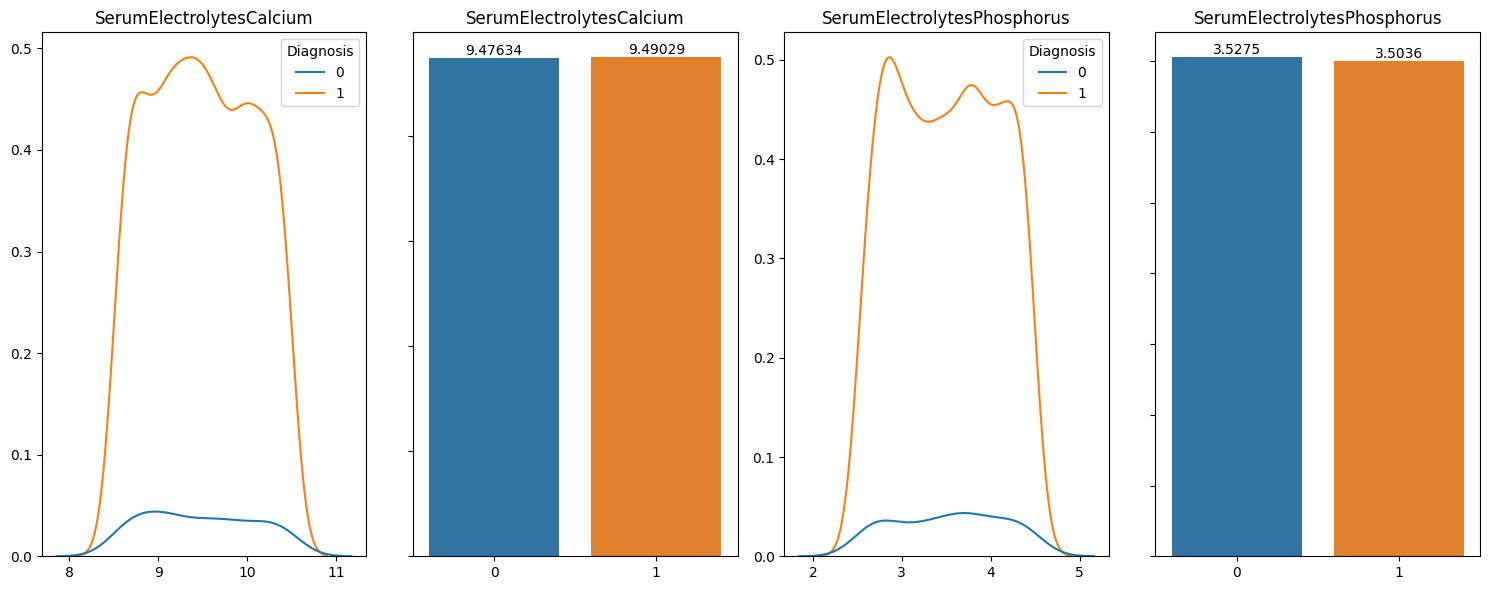

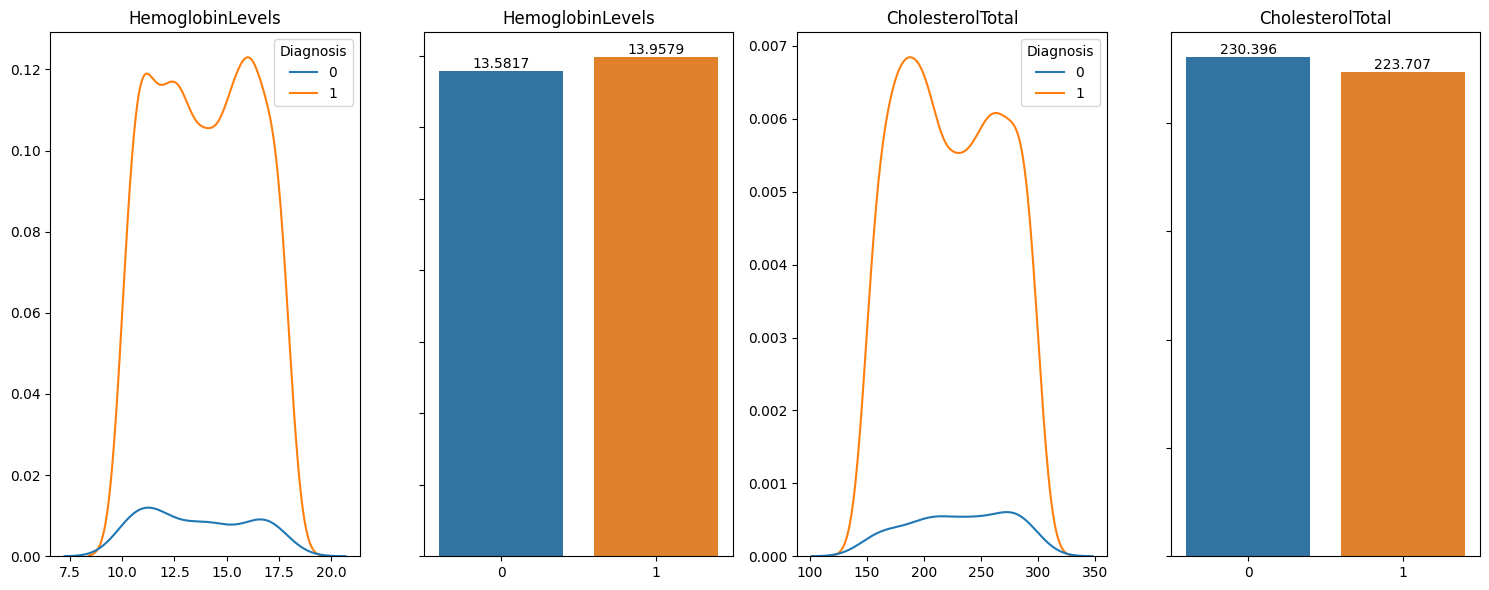

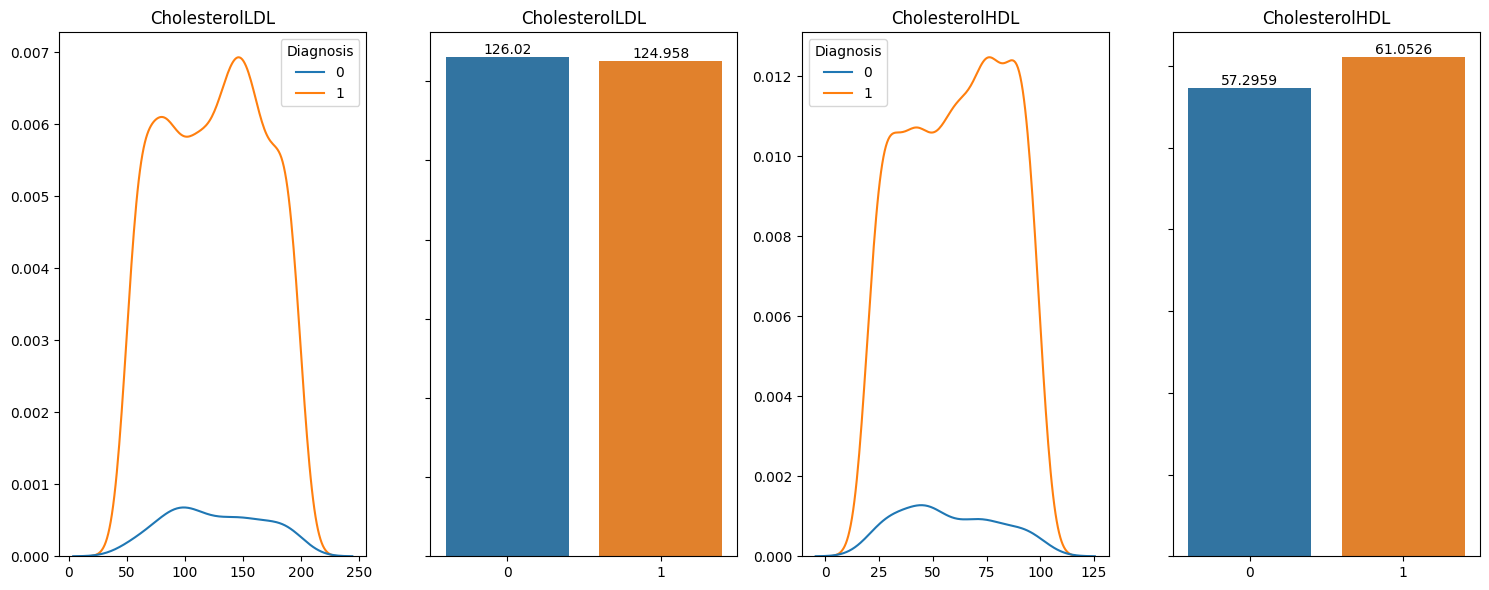

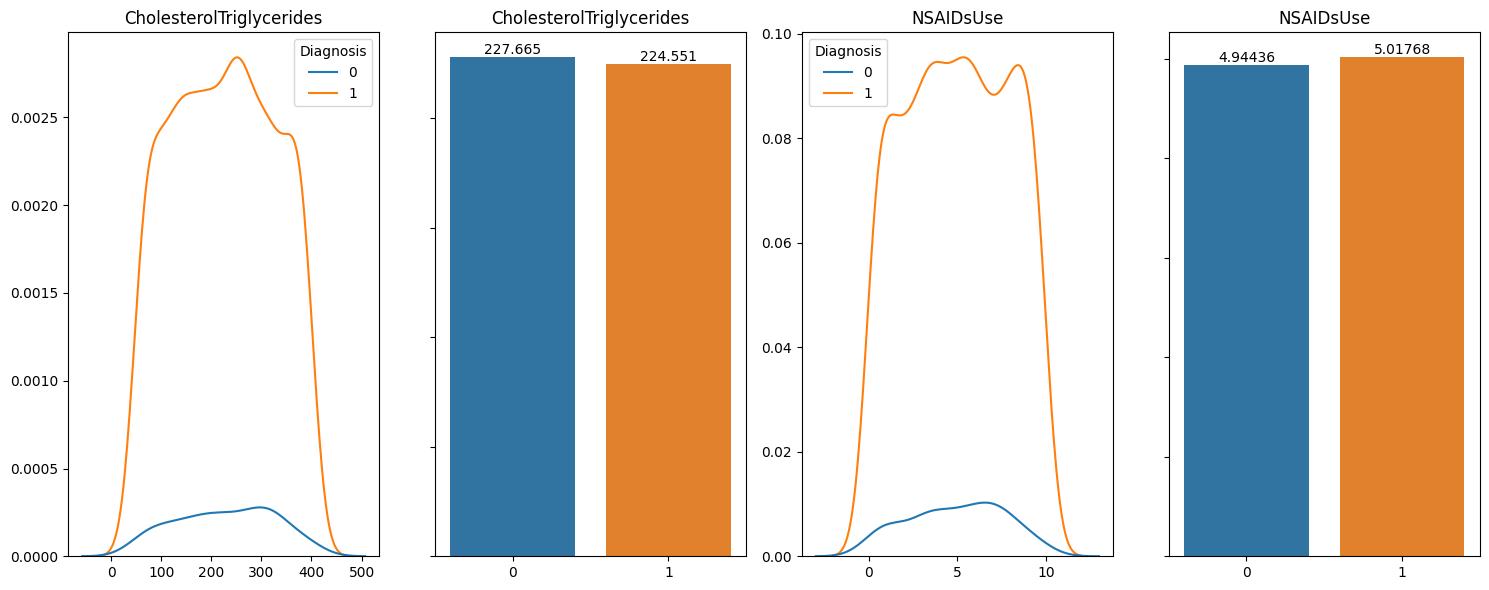

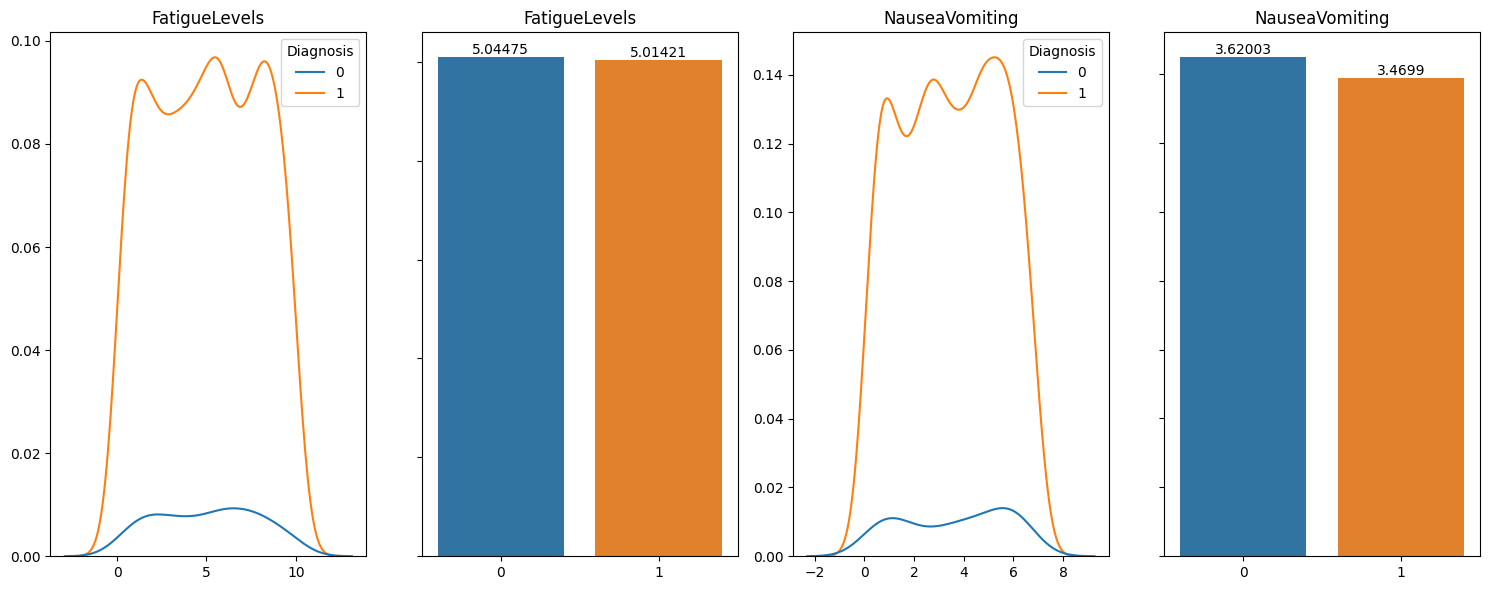

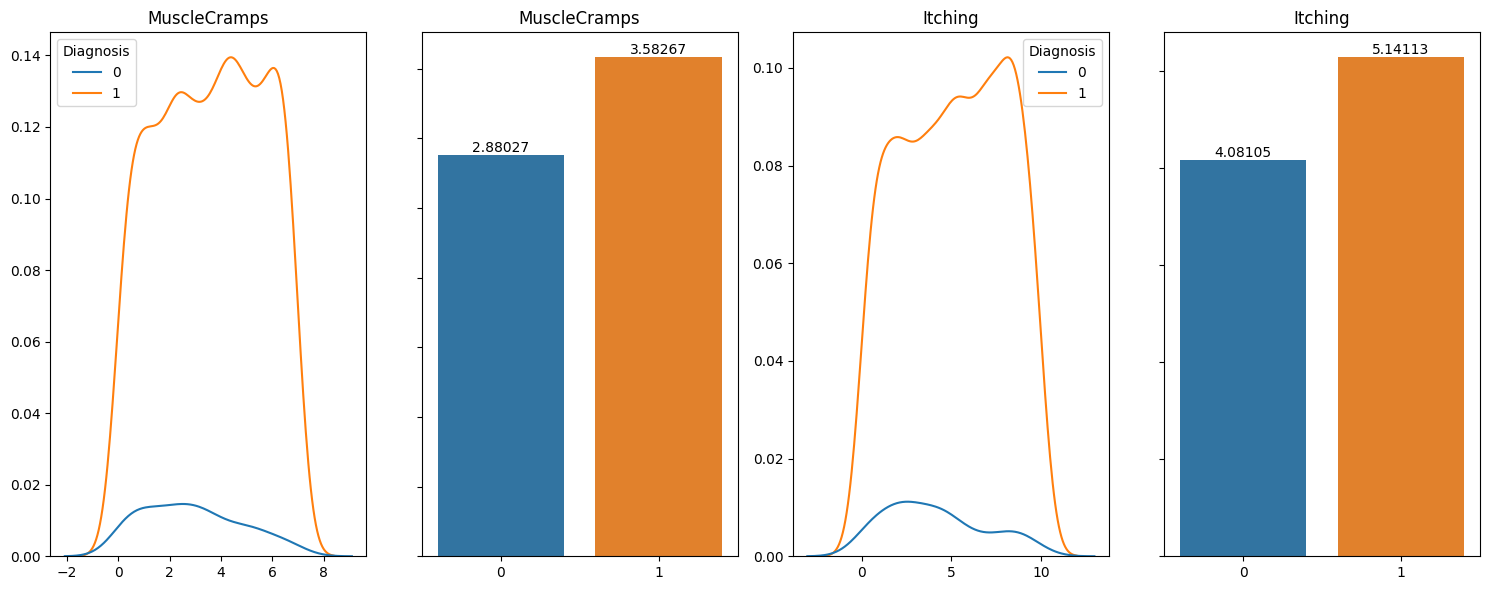

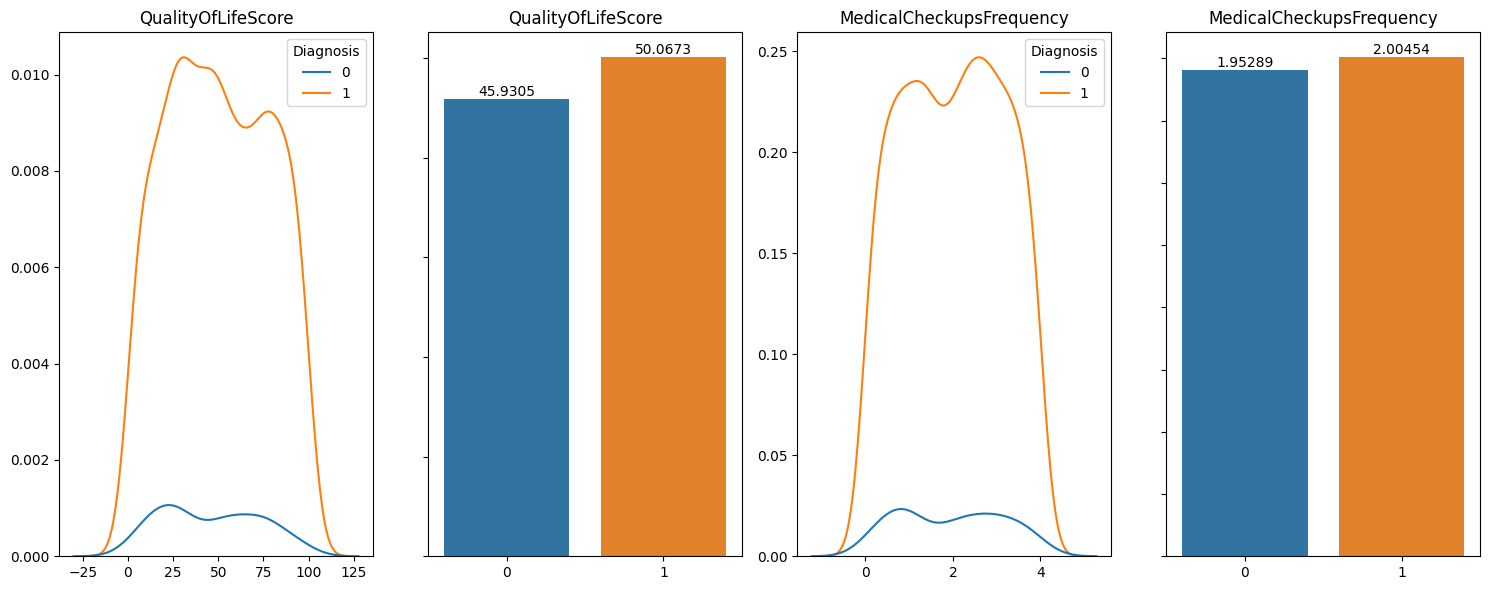

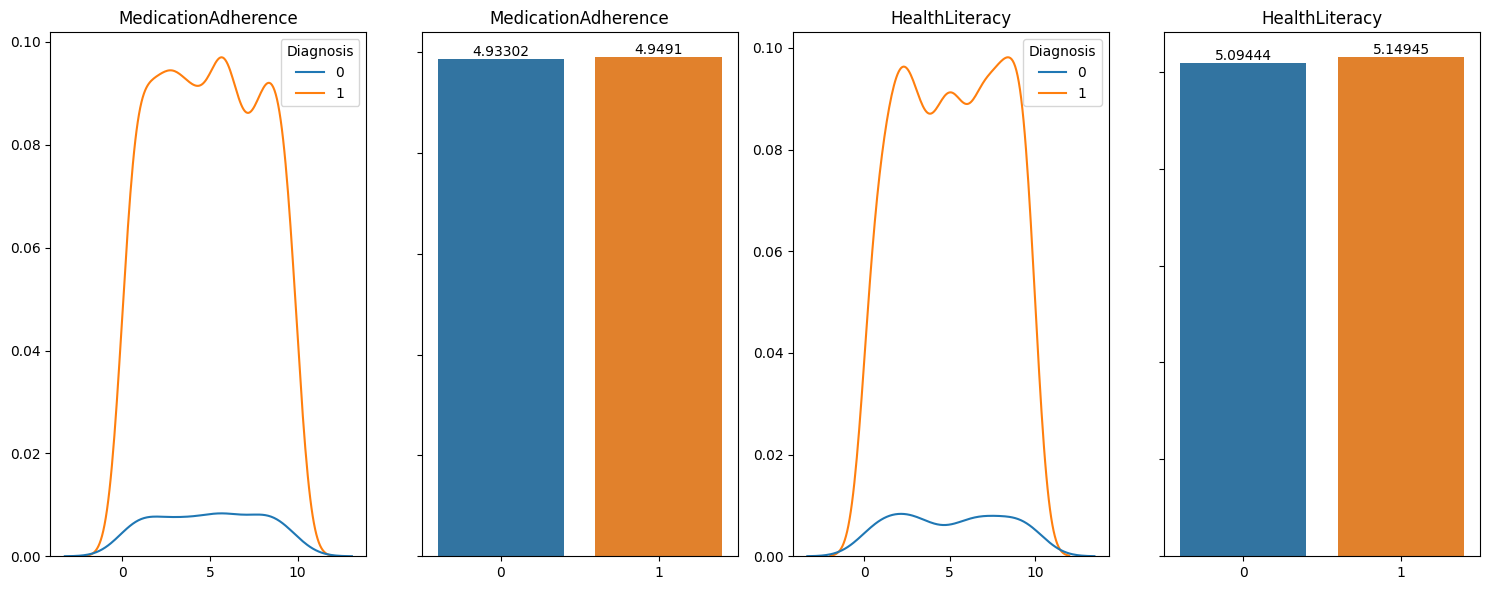

In [12]:
index = 0
grouped = df.groupby("Diagnosis")
for i in range(17):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(0, 4, 2):
        sns.kdeplot(df, x=nums[index], hue="Diagnosis", ax=axes[j])
        axes[j].set_xlabel("")
        axes[j].set_ylabel("")
        axes[j].set_title(nums[index])
        
        mean = grouped[nums[index]].mean()
        sns.barplot(x=mean.index, y=mean, ax=axes[j+1])
        for container in axes[j+1].containers:
            axes[j+1].bar_label(container)
        axes[j+1].set_yticklabels(())
        axes[j+1].set_ylabel("")
        axes[j+1].set_xlabel("")
        axes[j+1].set_title(nums[index])
        index += 1
    plt.tight_layout()
    plt.show()

# Scale values

In [13]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Dealing with class imbalances applying SMOTE

In [15]:
from collections import Counter

print("Before: ", Counter(y_train))
smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

print("After: ", Counter(y_train))

Before:  Counter({1: 1216, 0: 111})
After:  Counter({1: 1216, 0: 1216})


In [16]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    
    return score*100, report, cm

# Feature importance determined using Random Forest

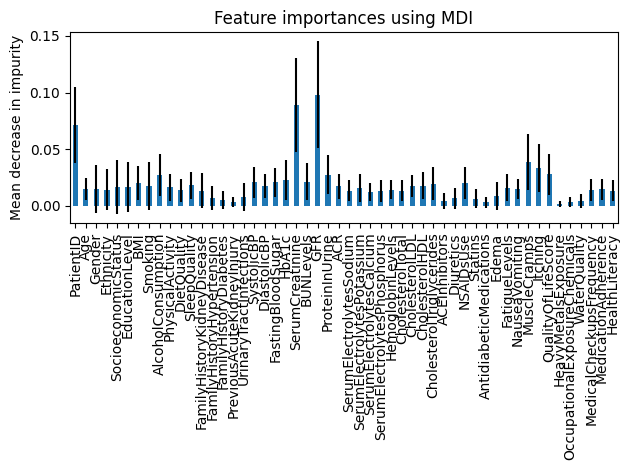

In [17]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Models defined

In [18]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgb = XGBClassifier()
lgb = LGBMClassifier()

models = [rfc, abc, gbc, etc,
         svc, lgr, xgb, lgb]

names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Support Vector Machine", "Logistic Regression", "XGBoost", "LightGBM"]

# Training models and saving their evaluation metrics

In [19]:
scores, reports, cms = [], dict(), dict()

for i, j in zip(models, names):
    score, report, cm = training(i)
    scores += [score]
    reports[j] = report
    cms[j] = cm

[LightGBM] [Info] Number of positive: 1216, number of negative: 1216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10328
[LightGBM] [Info] Number of data points in the train set: 2432, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


# Models evaluated and their accuracy scores

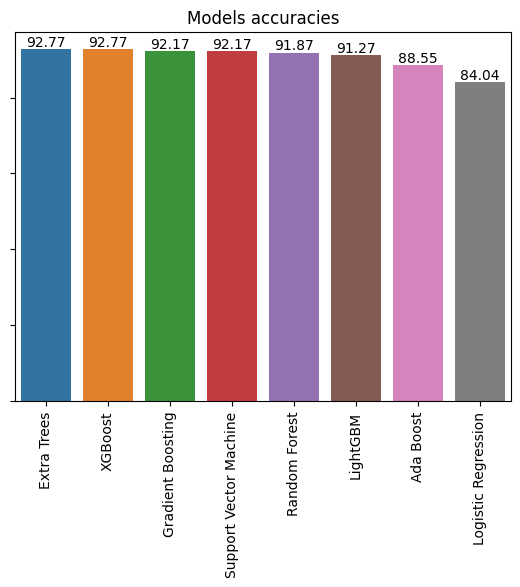

In [20]:
dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()

sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Models accuracies")
plt.show()

# Confusion matrices

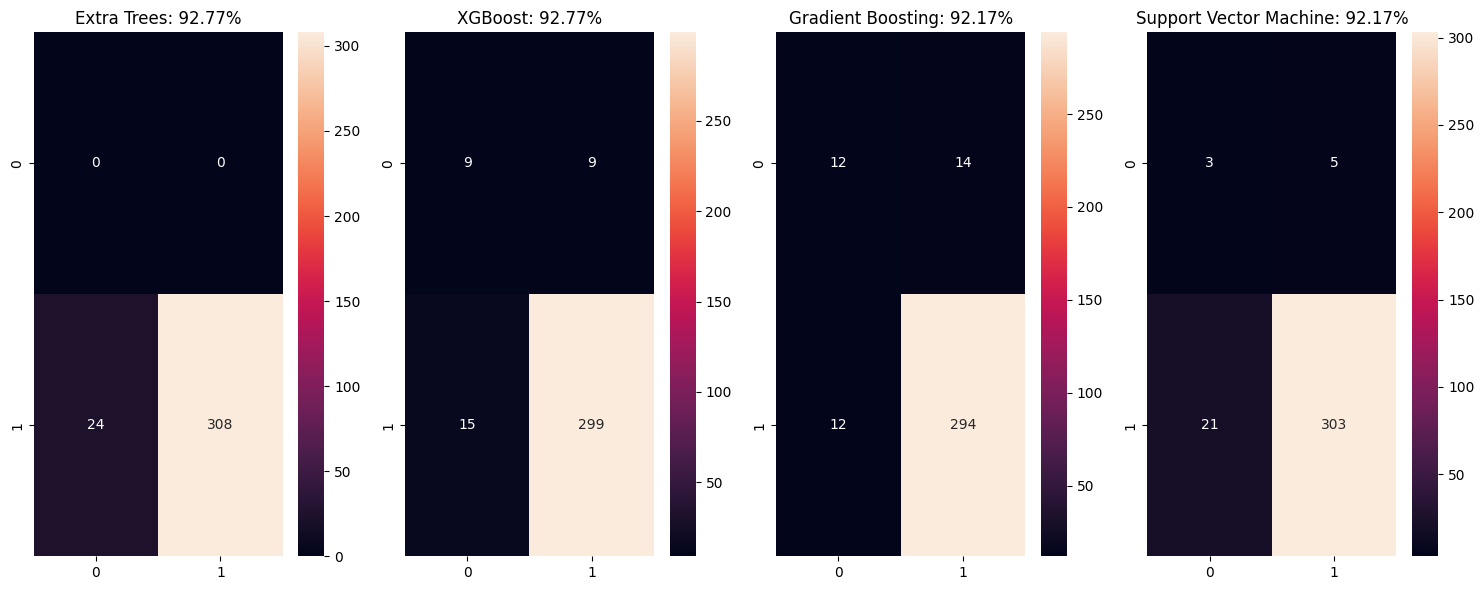

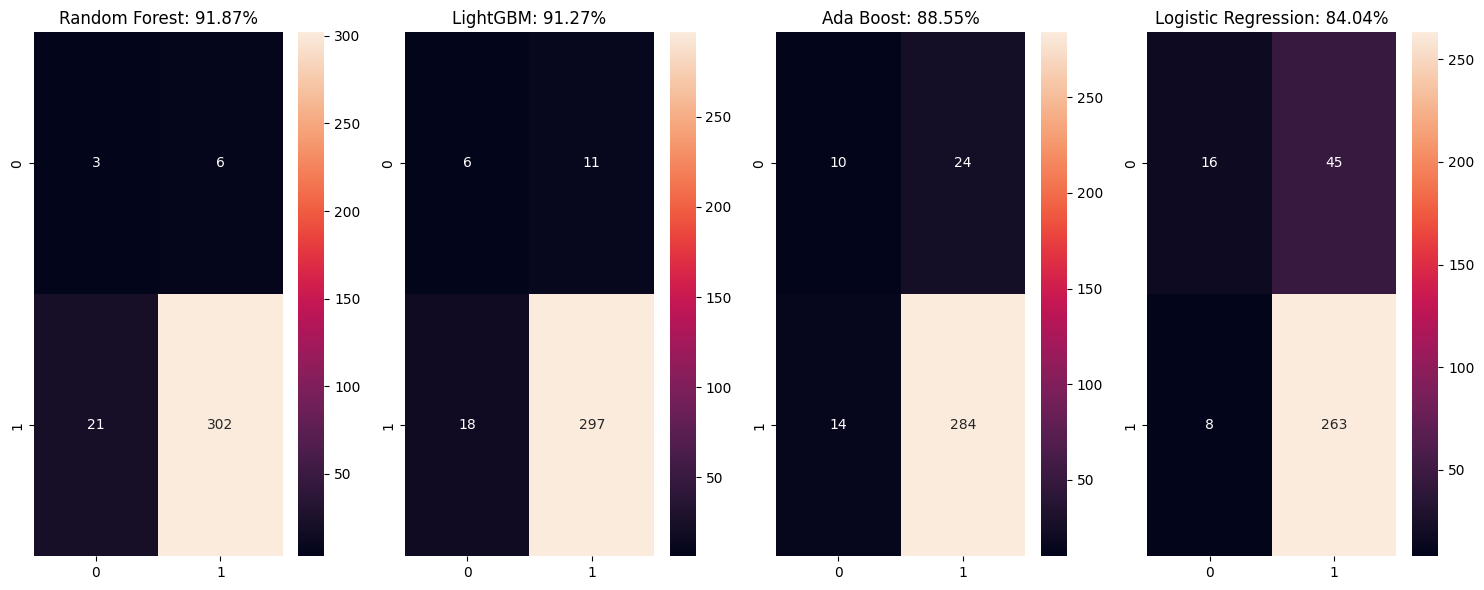

In [21]:
index = 0
for i in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(4):
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    plt.tight_layout()
    plt.show()

# Classification reports breakdown

In [22]:
for i in dd.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.96       332

    accuracy                           0.93       332
   macro avg       0.50      0.46      0.48       332
weighted avg       1.00      0.93      0.96       332




******************************
XGBoost
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        18
           1       0.97      0.95      0.96       314

    accuracy                           0.93       332
   macro avg       0.67      0.73      0.69       332
weighted avg       0.94      0.93      0.93       332




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        26
           1       0.95      0.96      0.96       306

    accuracy                           0.92  